In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# URL to the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Column names for the dataset
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Read the dataset into a DataFrame
iris_df = pd.read_csv(url, names=column_names)

In [2]:
iris_df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
 from sklearn.preprocessing import LabelEncoder , MinMaxScaler
 le = LabelEncoder()
 iris_df['species'] = le.fit_transform(iris_df['species'])
 iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
iris_df.isnull() .sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

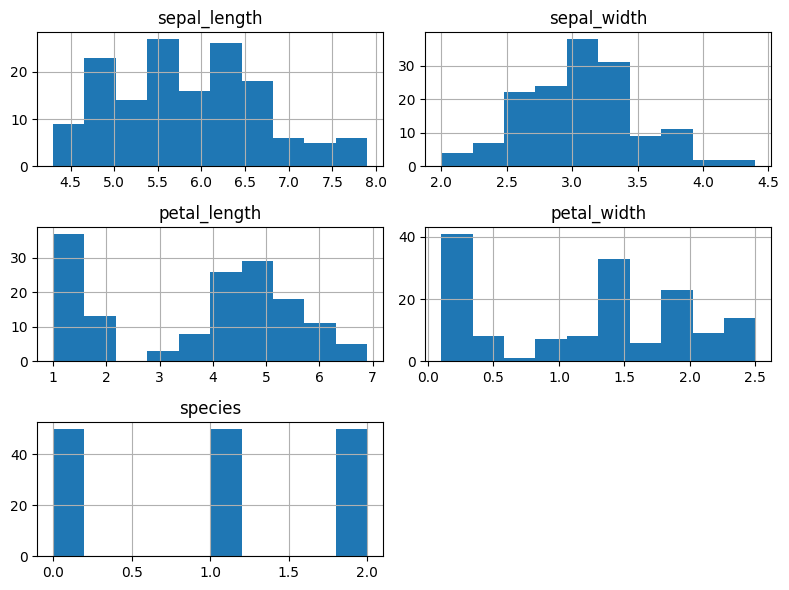

In [10]:
iris_df.hist(figsize=(8, 6))
plt.tight_layout()
plt.show()

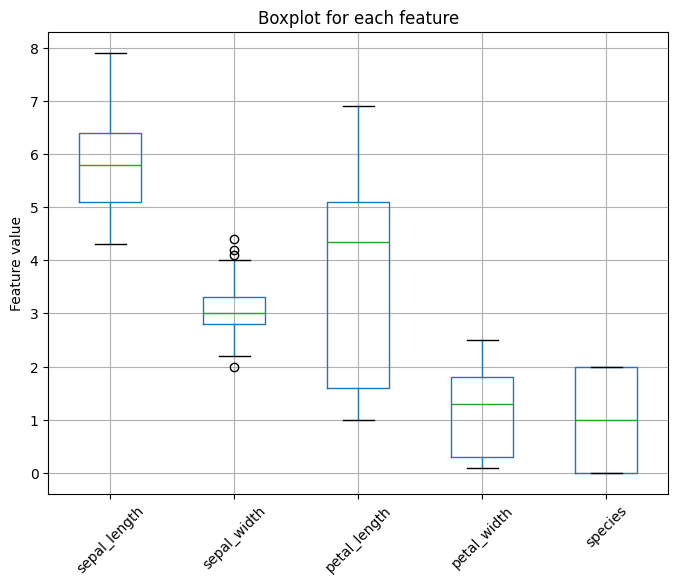

In [14]:
 plt.figure(figsize=(8, 6))
 iris_df.boxplot()
 plt.title('Boxplot for each feature')
 plt.ylabel('Feature value')
 plt.xticks(rotation=45)
 plt.show()

In [15]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]

In [16]:
# Columns to check for outliers
columns_to_check = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Remove outliers
cleaned_df = iris_df.copy()
for col in columns_to_check:
    cleaned_df = remove_outliers(cleaned_df, col)

# Summary
print('Before removing outliers:', len(iris_df))
print('After removing outliers:', len(cleaned_df))
print('Outliers removed:', len(iris_df) - len(cleaned_df))

Before removing outliers: 150
After removing outliers: 146
Outliers removed: 4


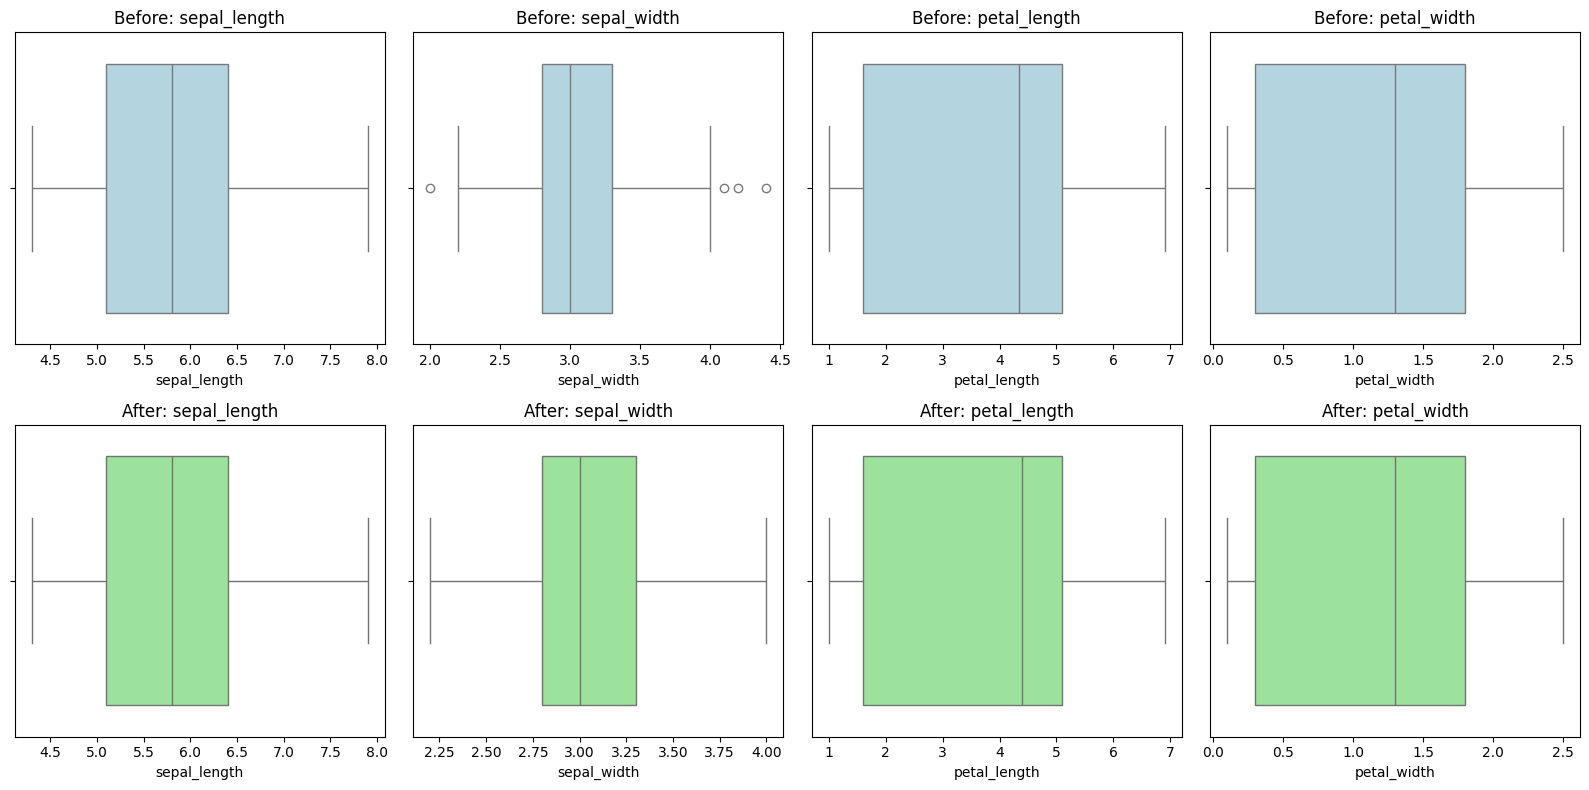

In [17]:
# Plotting boxplots before and after
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
for i, col in enumerate(columns_to_check):
    sns.boxplot(x=iris_df[col], ax=axes[0, i], color='lightblue')
    axes[0, i].set_title(f'Before: {col}')
    
    sns.boxplot(x=cleaned_df[col], ax=axes[1, i], color='lightgreen')
    axes[1, i].set_title(f'After: {col}')

plt.tight_layout()
plt.show()

Heatmap for the Correlation


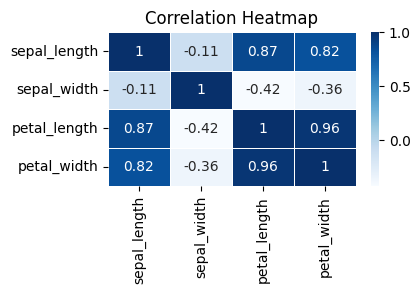

In [18]:
 print("Heatmap for the Correlation")
 subset_df = iris_df.iloc[:, :4]
 plt.figure(figsize=(4, 2))
 sns.heatmap(subset_df.corr(), annot=True, cmap="Blues", linewidths=0.5)
 plt.title("Correlation Heatmap")
 plt.show()
 